# Machine Learning

**Health Insurance Marketplace** 

In this part I will try to predict Individual Rates using regression models and will comapare results and performance of these models. We have researched the data on all the state of US. 
As the data is huge, so to avoid getting into memory run out issues I will concentrate on Florida's premium. As per my analyisis Florida has the maximum number of Plans therefore I have opted for this state

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
import datetime
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [2]:
rate = pd.read_csv('rate_FL.csv')
planattribute =  pd.read_csv('plan_att_FL.csv')
bcs = pd.read_csv('bcs_FL.csv')

In [3]:
#Reading full files

#rate = pd.read_csv('merged_rate.csv')
#planattribute =  pd.read_csv('merged_plan_attribute.csv')
#bcs = pd.read_csv('merged_benefits.csv')

#planattribute.drop_duplicates(inplace=True)
#rate.drop_duplicates(inplace=True)
#bcs.drop_duplicates(inplace=True)

#rate.drop('Unnamed: 0',axis=1,inplace=True)
#planattribute.drop('Unnamed: 0',axis=1,inplace=True)
#bcs.drop('Unnamed: 0',axis=1,inplace=True)


#Filtering with particular state

#rate = rate[rate['StateCode']=='FL']
#planattribute = planattribute[planattribute['StateCode']=='FL']
#bcs = bcs[bcs['StateCode']=='FL']

# Saving the file to local machine for the sate

#rate.to_csv('rate_FL.csv',index_label=False)
#planattribute.to_csv('plan_att_FL.csv',index_label=False)
#bcs.to_csv('bcs_FL.csv',index_label=False)

In [4]:
bcs.reset_index(inplace=True)
planattribute.reset_index(inplace=True)
rate.reset_index(inplace=True)

In [5]:
bcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585724 entries, 0 to 585723
Data columns (total 20 columns):
index                  585724 non-null int64
BusinessYear           585724 non-null int64
StateCode              585724 non-null object
IssuerId               585724 non-null int64
StandardComponentId    585724 non-null object
PlanId                 585724 non-null object
BenefitName            585724 non-null object
IsEHB                  585724 non-null object
IsCovered              585724 non-null object
QuantLimitOnSvc        585724 non-null object
EHBVarReason           585724 non-null object
CopayInnTier1Value     585724 non-null float64
CopayInnTier1Unit      585724 non-null object
CopayInnTier2Value     585724 non-null float64
CopayInnTier2Unit      585724 non-null object
CopayOutofNetValue     585724 non-null float64
CopayOutofNetUnit      585724 non-null object
CoinsInnTier1Value     585724 non-null float64
CoinsInnTier2Value     585724 non-null float64
CoinsOutofNet

In [6]:
planattribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 8 columns):
index                         8320 non-null int64
BusinessYear                  8320 non-null int64
StateCode                     8320 non-null object
PlanId                        8320 non-null object
MetalLevel                    8320 non-null object
TEHBInnTier1IndividualMOOP    8320 non-null float64
TEHBInnTier2IndividualMOOP    8320 non-null float64
TEHBOutOfNetIndividualMOOP    8320 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 520.1+ KB


In [7]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737653 entries, 0 to 2737652
Data columns (total 19 columns):
index                                        int64
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64

In [8]:
planattribute['PlanId'] = planattribute['PlanId'].str.split('-').str[0]
#planattribute['PlanId'] =planattribute['PlanId1']
#planattribute.drop(['PlanId1'],inplace=True,axis=1)

In [9]:
#Now merge the plan attributes dataset with the rate benefit dataset
rate_plan = pd.merge(rate,planattribute, on=['BusinessYear','StateCode','PlanId'], how = 'left',indicator=True)
#rate_plan.drop_duplicates(inplace=True)

In [10]:
rate_plan.reset_index(inplace=True)
rate_plan.drop(['index','_merge','index_x','index_y'],axis=1,inplace=True)

In [11]:
rate_plan.head()

,BusinessYear,StateCode,IssuerId,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetIndividualMOOP
0,2014,FL,15833,2014-01-01,2014-12-31,15833FL0020001,Rating Area 1,No Preference,0-20,22.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,0.0,0.0,0.0
1,2014,FL,15833,2014-01-01,2014-12-31,15833FL0020001,Rating Area 1,No Preference,0-20,22.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,0.0,0.0,0.0
2,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 1,No Preference,Family Option,21.98,0.0,44.00,47.38,72.77,110.87,69.40,94.79,132.89,High,0.0,0.0,0.0
3,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 1,No Preference,Family Option,21.98,0.0,44.00,47.38,72.77,110.87,69.40,94.79,132.89,High,0.0,0.0,0.0
4,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 2,No Preference,Family Option,22.29,0.0,44.63,48.00,73.71,112.28,70.34,96.05,134.62,High,0.0,0.0,0.0


In [12]:
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201634 entries, 0 to 7201633
Data columns (total 22 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float

In [13]:
rate_plan.isna().sum()
#Tobacco column has few NAs which is very few as respect to the overall records we have. So we can delete those records. 

BusinessYear                                   0
StateCode                                      0
IssuerId                                       0
RateEffectiveDate                              0
RateExpirationDate                             0
PlanId                                         0
RatingAreaId                                   0
Tobacco                                      108
Age                                            0
IndividualRate                                 0
IndividualTobaccoRate                          0
Couple                                         0
PrimarySubscriberAndOneDependent               0
PrimarySubscriberAndTwoDependents              0
PrimarySubscriberAndThreeOrMoreDependents      0
CoupleAndOneDependent                          0
CoupleAndTwoDependents                         0
CoupleAndThreeOrMoreDependents                 0
MetalLevel                                     0
TEHBInnTier1IndividualMOOP                     0
TEHBInnTier2Individu

In [14]:
rate_plan.dropna(inplace=True)
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7201526 entries, 0 to 7201633
Data columns (total 22 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float

In [15]:
#Convert the dates to proper format and take the duration of the plan by taking difference 
#of the Expiration date and effective date
effdate = pd.to_datetime(rate_plan['RateEffectiveDate'], format='%Y-%m-%d').dt.date
expdate = pd.to_datetime(rate_plan['RateExpirationDate'], format='%Y-%m-%d').dt.date
duration = expdate - effdate
rate_plan.drop(['RateEffectiveDate','RateExpirationDate'],inplace=True,axis=1)
rate_plan['Duration'] = duration.astype('str').str.split(' ').str[0]


In [16]:
#Checking the type of Metal Level in our dataset
rate_plan.MetalLevel.unique()

array(['Low', 'High', 'Gold', 'Silver', 'Bronze', 'Platinum',
       'Catastrophic', 'Expanded Bronze'], dtype=object)

In [17]:
#MetalLevel as Low and High are of Dental. As we are doing the analysis for Medical benefits, so we should delete those records
rate_plan = rate_plan[(rate_plan['MetalLevel'] != 'Low') & (rate_plan['MetalLevel'] != 'High')]
rate_plan.MetalLevel.unique()

array(['Gold', 'Silver', 'Bronze', 'Platinum', 'Catastrophic',
       'Expanded Bronze'], dtype=object)

In [18]:
rate_plan['MetalLevel'] = rate_plan['MetalLevel'].astype('category')

In [19]:
#In 2017 the Age bucket for the kids was changed from 0-20 to 0-14 so therefore we have some discrepancy in that Age group
#Also, the age for senior citizen was reduced to 4 age.
#For simplicity, I am keeping all the age group from 0-20 in 0-20 group only
rate_plan.Age.unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over', '0-14', '15', '16', '17', '18', '19', '20',
       '64 and over'], dtype=object)

In [20]:
rate_plan['Age'].replace('0-14', '0-20',inplace = True)
rate_plan['Age'].replace('0-15', '0-20',inplace = True)
rate_plan['Age'].replace('16', '0-20',inplace = True)
rate_plan['Age'].replace('17', '0-20',inplace = True)
rate_plan['Age'].replace('18', '0-20',inplace = True)
rate_plan['Age'].replace('19', '0-20',inplace = True)
rate_plan['Age'].replace('20', '0-20',inplace = True)
rate_plan['Age'].replace('0-20', '20',inplace = True)
rate_plan['Age'].replace('64 and over', '65',inplace = True)
rate_plan['Age'].replace('65 and over', '65',inplace = True)
rate_plan.Age.unique()

array(['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '15'], dtype=object)

In [21]:
rate_plan['Age'] = rate_plan['Age'].astype('category')

In [22]:
rate_plan['RatingAreaId'] = rate_plan['RatingAreaId'].str.split(' ').str[2]
rate_plan['RatingAreaId'].unique()

array(['32', '66', '1', '33', '2', '34', '3', '35', '5', '4', '36', '6',
       '37', '8', '38', '9', '7', '39', '10', '40', '11', '41', '15',
       '42', '16', '43', '12', '22', '44', '13', '26', '45', '14', '27',
       '46', '28', '47', '30', '48', '17', '49', '18', '50', '19', '51',
       '20', '52', '21', '53', '54', '23', '55', '24', '56', '25', '57',
       '58', '59', '60', '29', '61', '62', '31', '63', '64', '65', '67'],
      dtype=object)

In [23]:
rate_plan['RatingAreaId'] = rate_plan['RatingAreaId'].astype('category')

In [24]:
rate_plan['Tobacco'].unique() 

array(['Tobacco User/Non-Tobacco User', 'No Preference'], dtype=object)

In [25]:
rate_plan['Tobacco'] = rate_plan['Tobacco'].astype('category')

In [26]:
#rate_plan['StateCode'] = rate_plan['StateCode'].astype('category')

In [27]:
#We can see the difference in the space utilization of the current dataset. Earlier the dataset was 5GB but now its half of it.
#This is how helpful it is to make the data Categorical
rate_plan.reset_index(inplace=True)
rate_plan.drop(['index'],inplace=True,axis=1)
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155187 entries, 0 to 5155186
Data columns (total 21 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
PlanId                                       object
RatingAreaId                                 category
Tobacco                                      category
Age                                          category
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
MetalLevel                                

In [28]:
bcs['PlanId1'] = bcs['PlanId']
bcs['PlanId'] = bcs['StandardComponentId']
bcs['StandardComponentId'] = bcs['PlanId1']
bcs.drop('PlanId1',axis=1,inplace=True)

In [29]:
bcs_plan = pd.merge(bcs,planattribute, on=['BusinessYear','PlanId','StateCode'], how = 'left',indicator=True)
bcs_plan = bcs_plan[(bcs_plan['MetalLevel'] != 'Low') & (bcs_plan['MetalLevel'] != 'High')]
drop_columns = ['StateCode','MetalLevel','TEHBInnTier1IndividualMOOP',
                'TEHBInnTier2IndividualMOOP','TEHBOutOfNetIndividualMOOP','_merge','index_x','index_y']
bcs_plan.drop(drop_columns,axis=1,inplace=True)
bcs_plan.reset_index(inplace=True)
bcs_plan.drop(['index'],inplace=True,axis=1)
bcs_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735033 entries, 0 to 2735032
Data columns (total 18 columns):
BusinessYear           int64
IssuerId               int64
StandardComponentId    object
PlanId                 object
BenefitName            object
IsEHB                  object
IsCovered              object
QuantLimitOnSvc        object
EHBVarReason           object
CopayInnTier1Value     float64
CopayInnTier1Unit      object
CopayInnTier2Value     float64
CopayInnTier2Unit      object
CopayOutofNetValue     float64
CopayOutofNetUnit      object
CoinsInnTier1Value     float64
CoinsInnTier2Value     float64
CoinsOutofNetValue     float64
dtypes: float64(6), int64(2), object(10)
memory usage: 375.6+ MB


In [30]:
#Sort both the plans with common columns
rate_plan = rate_plan.sort_values(by=['BusinessYear','PlanId','IssuerId'], axis=0, ascending=True, kind='quicksort', na_position='last')
bcs_plan = bcs_plan.sort_values(by=['BusinessYear','PlanId','IssuerId'], axis=0, ascending=True, kind='quicksort', na_position='last')

In [31]:
#del(bcs,benefitcount,benefitssum,benefitsum,rate,planattribute)

In [32]:
#rate_plan.info()

In [33]:
# creating a empty bucket to save result
#merge_result = pd.DataFrame(columns=(rate_plan.columns.append(bcs_plan.columns)).unique())
#merge_result.to_csv("rate_bcs_plan.csv",index_label=False)
#rate_plan.to_csv("rate_plan.csv",index_label=False)

In [34]:
#def preprocess(x):
#    df2=pd.merge(x,bcs_plan, on=['BusinessYear','PlanId','IssuerId'], how = 'left',indicator=True)
#    df2.to_csv("rate_bcs_plan.csv",mode="a",header=False,index=False)

In [35]:
#reader = pd.read_csv("rate_plan.csv", chunksize=10000) # chunksize depends with you colsize

#[preprocess(r) for r in reader]
#rate_plan_bcs = pd.merge(rate_plan,bcs_plan, on=['BusinessYear','PlanId','IssuerId'], how = 'left',indicator=True)

In [36]:
#Benefits and rate can be combined together. These files are huge and combining them will take too much of resources 
#and merge will go out of memory. So to tackle it I have summarized the Benefits details so that 1 to many relationship
#can be used in combining them.
group= bcs_plan.groupby(['BusinessYear', 'PlanId','IssuerId'])
benefit1 = group['BenefitName'].count()
benefit2 = group['IsEHB'].apply(lambda x: x.value_counts().index[0])
benefit3 = group['IsCovered'].apply(lambda x: x.value_counts().index[0])
benefit4 = group['QuantLimitOnSvc'].apply(lambda x: x.value_counts().index[0])
benefitssum = pd.concat([benefit1,benefit2,benefit3,benefit4],axis=1)
benefitssum.reset_index(inplace=True)
del(benefit1,benefit2,benefit3,benefit4)
benefitssum.info()
#['BenefitName'].count().to_frame().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 7 columns):
BusinessYear       1996 non-null int64
PlanId             1996 non-null object
IssuerId           1996 non-null int64
BenefitName        1996 non-null int64
IsEHB              1996 non-null object
IsCovered          1996 non-null object
QuantLimitOnSvc    1996 non-null object
dtypes: int64(3), object(4)
memory usage: 109.2+ KB


In [37]:
rate_plan_bcs = pd.merge(rate_plan,benefitssum, on=['BusinessYear','PlanId','IssuerId'], how = 'left',indicator=True)

In [38]:
rate_plan_bcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 26 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
PlanId                                       object
RatingAreaId                                 category
Tobacco                                      category
Age                                          category
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
MetalLevel                                

In [39]:
# Create dataframe with the columns which will be required for this Regression Analysis: ml_rates
rates_ml = rate_plan_bcs[['Age','BusinessYear','IndividualRate','IndividualTobaccoRate',
                 'RatingAreaId','Tobacco','Duration','MetalLevel','TEHBInnTier1IndividualMOOP','TEHBOutOfNetIndividualMOOP'
                    ,'IsEHB','BenefitName']]
rates_ml.head() # just to make sure we have all the required columns

,Age,BusinessYear,IndividualRate,IndividualTobaccoRate,RatingAreaId,Tobacco,Duration,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,IsEHB,BenefitName
0,20,2014,172.27,0.0,1,No Preference,89,Silver,6000.0,12000.0,Yes,75
1,20,2014,176.63,0.0,1,No Preference,90,Silver,6000.0,12000.0,Yes,75
2,20,2014,181.09,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75
3,20,2014,185.67,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75
4,21,2014,292.39,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75


**We have all the cleaned data for prediction**

**We will be predicting Individual rate and IndividualTobacco rate and CoupleRate seaprately**


In [40]:
rates_ml[['IndividualRate','IndividualTobaccoRate']].describe()

,IndividualRate,IndividualTobaccoRate
count,5.155187e+06,5.155187e+06
mean,5.374643e+02,5.635067e+02
std,2.893101e+02,3.952735e+02
min,5.199000e+01,0.000000e+00
25%,3.326900e+02,3.297100e+02
50%,4.536100e+02,4.805700e+02
75%,6.716500e+02,7.539400e+02
max,3.072060e+03,3.686490e+03


In [41]:
#Lets check how these rates changes over the year 
meanrateperyear = rates_ml[['BusinessYear','IndividualRate','IndividualTobaccoRate']].groupby('BusinessYear').mean()
meanrateperyear

,IndividualRate,IndividualTobaccoRate
BusinessYear,,
2014,424.254497,465.777226
2015,480.328384,446.307460
2016,489.392785,509.288960
2017,559.321436,554.570253
2018,676.881823,735.876146
2019,716.075636,826.059768


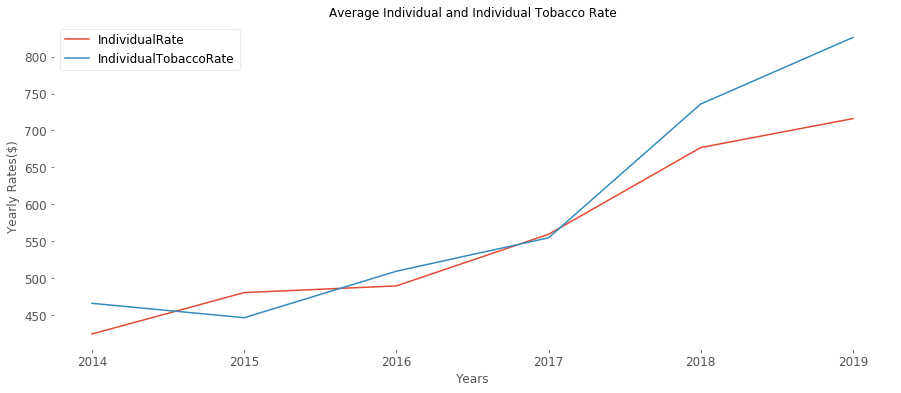

In [42]:
# Plot the above dataframe
meanrateperyear.plot(figsize=(15, 6), fontsize="large")
plt.title('Average Individual and Individual Tobacco Rate', fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.ylabel("Yearly Rates($)", fontsize="large")
plt.legend(fontsize="large")
plt.show()

We can see above that the individual rates has been increasing since its inception but. The increase in rate is also getting bigger every year. But the same is not true for the Individual Tobacco Rate. The second year of exchange saw a fall in individual tobacco rate but again started increasing every year and last year the incease in rate is very large.

**Lets start with individual monthly rate prediction.**

As the rate will be decided on whether a person smokes or not. If somebody smokes then individual has to fetch more money. So lets add the premiums as individual has to pay more if he smokes.  
We will create two dataframes one for the target variables (IndividualRatetotal and other for dependent variables only. In this case depended variables are Age','BusinessYear','IndividualRate','IndividualTobaccoRate',               'RatingAreaId','StateCode','Tobacco','Duration','StateCode','MetalLevel','TEHBInnTier1IndividualMOOP','TEHBOutOfNetIndividualMOOP']].

In [43]:
# first check for the nan values if any in the dataframe.
rates_ml.isnull().any(axis=0)

Age                           False
BusinessYear                  False
IndividualRate                False
IndividualTobaccoRate         False
RatingAreaId                  False
Tobacco                       False
Duration                      False
MetalLevel                    False
TEHBInnTier1IndividualMOOP    False
TEHBOutOfNetIndividualMOOP    False
IsEHB                         False
BenefitName                   False
dtype: bool

In [44]:
rates_ml['IndividualRateTotal'] = rates_ml['IndividualRate'] + rates_ml['IndividualTobaccoRate']
rates_ml['IndividualRateTotallog'] = np.log(rates_ml['IndividualRateTotal'])
rates_ml.drop(['IndividualRate','IndividualTobaccoRate',],axis=1,inplace=True)

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

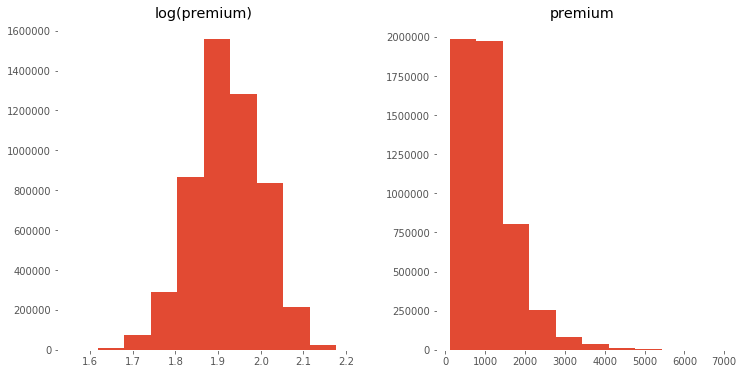

In [45]:
#Plotting the histogram for premiums
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"premium":rates_ml['IndividualRateTotal'], "log(premium)":np.log(rates_ml['IndividualRateTotallog'])})
prices.hist()
plt.show()
# It can be seen that individual rate is rigth skewed. So to make it normal we have to take a log of it.

**As most of the data is catgorical in the dataset so we need to do one hotEncoding of the data to make it use in the Regression analysis**

# Regression Analysis

Data for the years 2014 to 2018 will be taken as Train data and the data for 2019 will be taken as Test data.
Let's divide the predictors into the same and also the premiums. 

In [46]:
rates_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           category
BusinessYear                  int64
RatingAreaId                  category
Tobacco                       category
Duration                      object
MetalLevel                    category
TEHBInnTier1IndividualMOOP    float64
TEHBOutOfNetIndividualMOOP    float64
IsEHB                         object
BenefitName                   int64
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: category(4), float64(4), int64(2), object(2)
memory usage: 373.6+ MB


In [47]:
rates_ml['BusinessYear'] = rates_ml['BusinessYear'].astype('int32')
rates_ml['Tobacco'] = rates_ml['Tobacco'].astype('category')
rates_ml['Duration'] = rates_ml['Duration'].astype('int32')
rates_ml['MetalLevel'] = rates_ml['MetalLevel'].astype('category')
rates_ml['IsEHB'] = rates_ml['IsEHB'].astype('category')

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [48]:
rates_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           category
BusinessYear                  int32
RatingAreaId                  category
Tobacco                       category
Duration                      int32
MetalLevel                    category
TEHBInnTier1IndividualMOOP    float64
TEHBOutOfNetIndividualMOOP    float64
IsEHB                         category
BenefitName                   int64
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: category(5), float64(4), int32(2), int64(1)
memory usage: 299.9 MB


In [2]:
#Run it only when needs to start in between

import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
#rates_ml.to_csv("rates_ml.csv",index_label=False)
rates_ml = pd.read_csv("rates_ml.csv")
rates_ml['BusinessYear'] = rates_ml['BusinessYear'].astype('int32')
rates_ml['Tobacco'] = rates_ml['Tobacco'].astype('category')
rates_ml['Duration'] = rates_ml['Duration'].astype('int32')
rates_ml['MetalLevel'] = rates_ml['MetalLevel'].astype('category')
rates_ml['IsEHB'] = rates_ml['IsEHB'].astype('category')
rates_ml['RatingAreaId'] = rates_ml['RatingAreaId'].astype('int32')
rates_ml['TEHBInnTier1IndividualMOOP'] = rates_ml['TEHBInnTier1IndividualMOOP'].astype('float32')
rates_ml['TEHBOutOfNetIndividualMOOP'] = rates_ml['TEHBOutOfNetIndividualMOOP'].astype('float32')
rates_ml_train_pred = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,:-2]
rates_ml_test_pred  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,:-2]
rates_ml_train_target = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,-1:]
rates_ml_test_target  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,-1:]
rates_ml_train_pred_dummies = pd.get_dummies(rates_ml_train_pred)
rates_ml_test_pred_dummies = pd.get_dummies(rates_ml_test_pred)
rates_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           int64
BusinessYear                  int32
RatingAreaId                  int32
Tobacco                       category
Duration                      int32
MetalLevel                    category
TEHBInnTier1IndividualMOOP    float32
TEHBOutOfNetIndividualMOOP    float32
IsEHB                         category
BenefitName                   int64
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: category(3), float32(2), float64(2), int32(3), int64(2)
memory usage: 309.7 MB


In [24]:
#Set the Base prediction for the Model. We have set the average of all the train years 
#and set that as predicted value of test year.

mean_of_all_years = rates_ml_train_target['IndividualRateTotallog'].mean()
baseline_predict = [mean_of_all_years]*rates_ml_test_target['IndividualRateTotallog'].shape[0]
print("The absolute error of base test is : ", mean_absolute_error(rates_ml_test_target['IndividualRateTotallog'], baseline_predict))
print("The MSE of base test is : ", mean_squared_error(rates_ml_test_target['IndividualRateTotallog'], baseline_predict))
print("The R square is " , r2_score(rates_ml_test_target['IndividualRateTotallog'], baseline_predict))

#The prediction of the base model is quite bad and we need a model which can be much better than this

The absolute error of base test is :  0.5049523894364845
The MSE of base test is :  0.41098057968368995
The R square is  -0.7326200803882243


In [50]:
rates_ml_train_pred = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,:-2]
rates_ml_test_pred  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,:-2]
rates_ml_train_target = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,-1:]
rates_ml_test_target  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,-1:]

In [51]:
rates_ml_train_pred_dummies = pd.get_dummies(rates_ml_train_pred)
rates_ml_test_pred_dummies = pd.get_dummies(rates_ml_test_pred)

In [52]:
rates_ml_train_pred_dummies.head()

,BusinessYear,Duration,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,BenefitName,Age_15,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60,Age_61,Age_62,Age_63,Age_64,Age_65,RatingAreaId_1,RatingAreaId_10,RatingAreaId_11,RatingAreaId_12,RatingAreaId_13,RatingAreaId_14,RatingAreaId_15,RatingAreaId_16,RatingAreaId_17,RatingAreaId_18,RatingAreaId_19,RatingAreaId_2,RatingAreaId_20,RatingAreaId_21,RatingAreaId_22,RatingAreaId_23,RatingAreaId_24,RatingAreaId_25,RatingAreaId_26,RatingAreaId_27,RatingAreaId_28,RatingAreaId_29,RatingAreaId_3,RatingAreaId_30,RatingAreaId_31,RatingAreaId_32,RatingAreaId_33,RatingAreaId_34,RatingAreaId_35,RatingAreaId_36,RatingAreaId_37,RatingAreaId_38,RatingAreaId_39,RatingAreaId_4,RatingAreaId_40,RatingAreaId_41,RatingAreaId_42,RatingAreaId_43,RatingAreaId_44,RatingAreaId_45,RatingAreaId_46,RatingAreaId_47,RatingAreaId_48,RatingAreaId_49,RatingAreaId_5,RatingAreaId_50,RatingAreaId_51,RatingAreaId_52,RatingAreaId_53,RatingAreaId_54,RatingAreaId_55,RatingAreaId_56,RatingAreaId_57,RatingAreaId_58,RatingAreaId_59,RatingAreaId_6,RatingAreaId_60,RatingAreaId_61,RatingAreaId_62,RatingAreaId_63,RatingAreaId_64,RatingAreaId_65,RatingAreaId_66,RatingAreaId_67,RatingAreaId_7,RatingAreaId_8,RatingAreaId_9,Tobacco_No Preference,Tobacco_Tobacco User/Non-Tobacco User,MetalLevel_Bronze,MetalLevel_Catastrophic,MetalLevel_Expanded Bronze,MetalLevel_Gold,MetalLevel_Platinum,MetalLevel_Silver,IsEHB_No,IsEHB_Yes
0,2014,89,6000.0,12000.0,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,2014,90,6000.0,12000.0,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
2,2014,91,6000.0,12000.0,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,2014,91,6000.0,12000.0,75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,2014,91,6000.0,12000.0,75,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [53]:
rates_ml_test_pred_dummies.head()

,BusinessYear,Duration,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,BenefitName,Age_15,Age_20,Age_21,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60,Age_61,Age_62,Age_63,Age_64,Age_65,RatingAreaId_1,RatingAreaId_10,RatingAreaId_11,RatingAreaId_12,RatingAreaId_13,RatingAreaId_14,RatingAreaId_15,RatingAreaId_16,RatingAreaId_17,RatingAreaId_18,RatingAreaId_19,RatingAreaId_2,RatingAreaId_20,RatingAreaId_21,RatingAreaId_22,RatingAreaId_23,RatingAreaId_24,RatingAreaId_25,RatingAreaId_26,RatingAreaId_27,RatingAreaId_28,RatingAreaId_29,RatingAreaId_3,RatingAreaId_30,RatingAreaId_31,RatingAreaId_32,RatingAreaId_33,RatingAreaId_34,RatingAreaId_35,RatingAreaId_36,RatingAreaId_37,RatingAreaId_38,RatingAreaId_39,RatingAreaId_4,RatingAreaId_40,RatingAreaId_41,RatingAreaId_42,RatingAreaId_43,RatingAreaId_44,RatingAreaId_45,RatingAreaId_46,RatingAreaId_47,RatingAreaId_48,RatingAreaId_49,RatingAreaId_5,RatingAreaId_50,RatingAreaId_51,RatingAreaId_52,RatingAreaId_53,RatingAreaId_54,RatingAreaId_55,RatingAreaId_56,RatingAreaId_57,RatingAreaId_58,RatingAreaId_59,RatingAreaId_6,RatingAreaId_60,RatingAreaId_61,RatingAreaId_62,RatingAreaId_63,RatingAreaId_64,RatingAreaId_65,RatingAreaId_66,RatingAreaId_67,RatingAreaId_7,RatingAreaId_8,RatingAreaId_9,Tobacco_No Preference,Tobacco_Tobacco User/Non-Tobacco User,MetalLevel_Bronze,MetalLevel_Catastrophic,MetalLevel_Expanded Bronze,MetalLevel_Gold,MetalLevel_Platinum,MetalLevel_Silver,IsEHB_No,IsEHB_Yes
4531151,2019,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4531152,2019,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4531153,2019,364,0.0,0.0,3626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4531154,2019,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4531155,2019,364,6300.0,14300.0,3626,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


# OLS
**Ordinary Least Square(OLS) method: For Individual Rate**

In [5]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import OLS

In [6]:
# initiate and fit the ols model: m
m = sm.OLS(rates_ml_train_target['IndividualRateTotallog'], rates_ml_train_pred_dummies).fit()

# predict using model m for the test data
prediction = m.predict(rates_ml_train_pred_dummies)

# print summary.
print(m.summary())

                              OLS Regression Results                              
Dep. Variable:     IndividualRateTotallog   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.848
Method:                     Least Squares   F-statistic:                 1.812e+06
Date:                    Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                            13:47:44   Log-Likelihood:             6.8201e+05
No. Observations:                 4531151   AIC:                        -1.364e+06
Df Residuals:                     4531136   BIC:                        -1.364e+06
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [7]:
# calculating the residuals
residual = rates_ml_train_target['IndividualRateTotallog'] - prediction

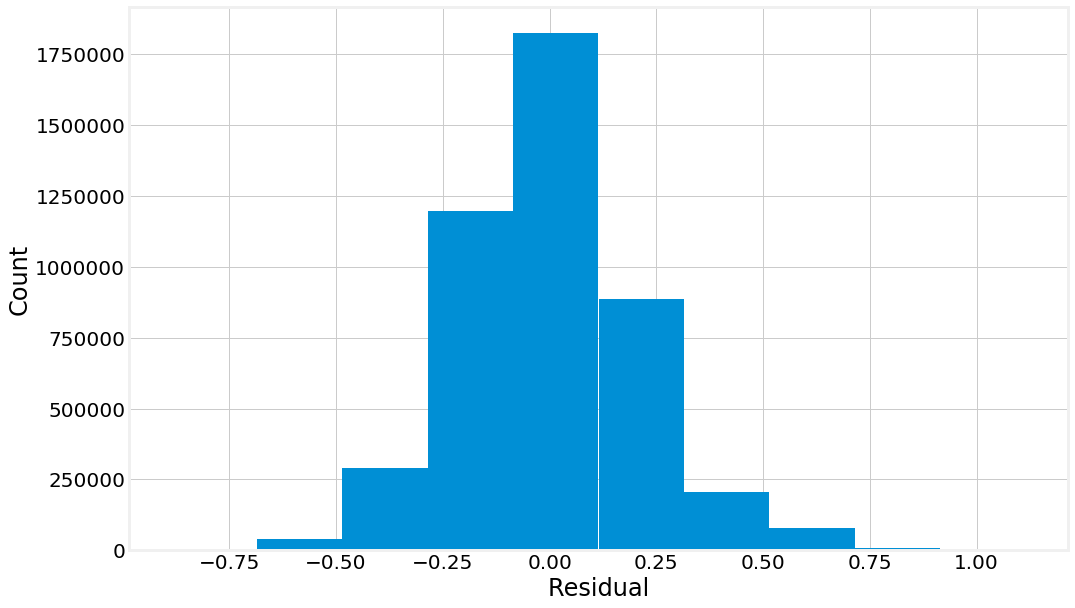

In [8]:
plt.hist(residual)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Quantile plot:

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. The above two plots suggests that the residual distribution is normal but with some outliers

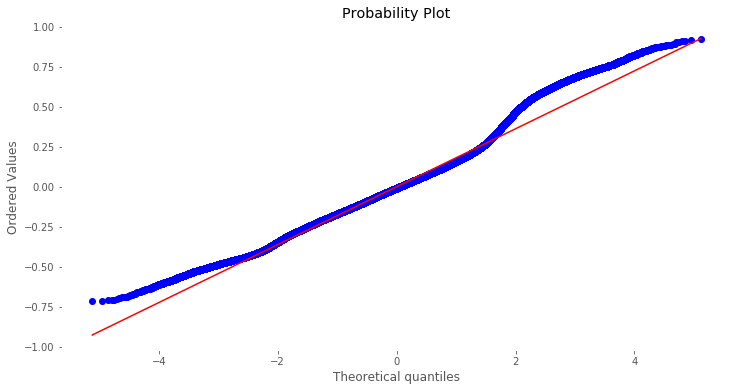

In [58]:
import scipy.stats as stats
stats.probplot(residual, plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

## Fitted Vs Residual plot 

It is used to detect non-linearity, unequal error variances, and outliers. Since the most of the data are near 0 on y axis the residual looks linear. There are no pattern which means that errors are normaly distributed. Looks like there are outliers. Hence we do not detect any voilations of the model assumption but there are outliers.

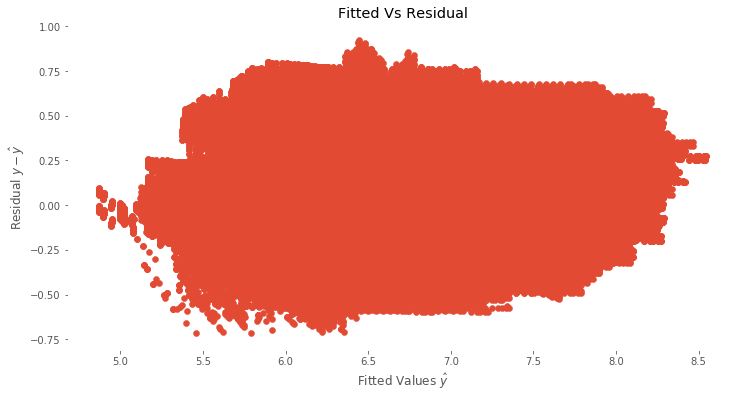

In [59]:
plt.scatter(prediction, residual)
plt.xlabel("Fitted Values $\hat{y}$")
plt.ylabel("Residual $y - \hat{y}$")
plt.title("Fitted Vs Residual")
plt.show()

In [9]:
prediction_test = m.predict(rates_ml_test_pred_dummies)

from sklearn.metrics import mean_absolute_error
print("The absolute error of test data is : ", mean_absolute_error(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

from sklearn.metrics import mean_squared_error
print("The MSE of test data is : ", mean_squared_error(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

from sklearn.metrics import r2_score
print("The out of sample R square is " , r2_score(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

The absolute error of test data is :  0.16668833812437642
The MSE of test data is :  0.041973706043149143
The out of sample R square is  0.823046417437425


In [61]:
# Find outliers #
# Bonferroni outlier test #
#test = m.outlier_test()

#print ('Bad data points (bonf(p) < 0.05):')
#print (test[test['bonf(p)'] < 0.05])

In [62]:
#from statsmodels.graphics.regressionplots import *
#plot_leverage_resid2(m)
#influence_plot(m)
#There are some high leverage points and some high residuals but no data points that are both

## Linear Regression 

In [3]:
# Create arrays for the features and the response variable
y_train = rates_ml_train_target['IndividualRateTotallog'].values
X_train = rates_ml_train_pred_dummies.values
y_test = rates_ml_test_target['IndividualRateTotallog'].values
X_test = rates_ml_test_pred_dummies.values

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [4]:
y_pred = lr.predict(X_test)
print("The absolute error of test data is : ", mean_absolute_error(y_test, y_pred))
print("The MSE of test data is : ", mean_squared_error(y_test, y_pred))
print("The out of sample R square is " , r2_score(y_test, y_pred))

# R Square value of .856 is quite good and same as what we got in OLS

NameError: name 'mean_absolute_error' is not defined

## Decision Tree regression
**Decision Tree** 

I will use DecisionTreeRegressor to predict the IndividualRate and will compare with the Linear model to check if the model improves in predicting the monthly rates.

In [11]:
# import necesaary packages from sklearn for descision tree model
from sklearn import tree

y_train = rates_ml_train_target['IndividualRateTotallog'].values
X_train = rates_ml_train_pred_dummies.values
y_test = rates_ml_test_target['IndividualRateTotallog'].values
X_test = rates_ml_test_pred_dummies.values

In [12]:
# For predicting continueous target we need to use DecisionTreeRegressor()
# and not DecisionTreeClassifier()
# create regressor and fit the model with training data: dt
dt = tree.DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)

In [13]:
dt_importances = pd.DataFrame(dt.feature_importances_, rates_ml_train_pred_dummies.columns, columns=["Importances"])
print(dt_importances)
print('Score', dt.score(X_train, y_train))

                                       Importances
Age                                       0.549933
BusinessYear                              0.105726
RatingAreaId                              0.020174
Duration                                  0.005130
TEHBInnTier1IndividualMOOP                0.017105
TEHBOutOfNetIndividualMOOP                0.018903
BenefitName                               0.020810
Tobacco_No Preference                     0.105816
Tobacco_Tobacco User/Non-Tobacco User     0.062596
MetalLevel_Bronze                         0.029076
MetalLevel_Catastrophic                   0.003277
MetalLevel_Expanded Bronze                0.007619
MetalLevel_Gold                           0.010882
MetalLevel_Platinum                       0.039770
MetalLevel_Silver                         0.003066
IsEHB_No                                  0.000078
IsEHB_Yes                                 0.000038
Score 0.9778290187539397


This model is approximately **97.8%** accurate, which is better than Linear model but this score is on training data. There could be overfitting as well as it is too accurate. 
We have to check the score on data which is not seen by the model i.e. test data.

**Feature Importance**
From the below graph it is confirmed that Age & Tobacco use are the major factor in deciding the PREMIUM. It is unarguably known fact as well.

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

                                       importance
Age                                      0.549933
Tobacco_No Preference                    0.105816
BusinessYear                             0.105726
Tobacco_Tobacco User/Non-Tobacco User    0.062596
MetalLevel_Platinum                      0.039770
MetalLevel_Bronze                        0.029076
BenefitName                              0.020810
RatingAreaId                             0.020174
TEHBOutOfNetIndividualMOOP               0.018903
TEHBInnTier1IndividualMOOP               0.017105
MetalLevel_Gold                          0.010882
MetalLevel_Expanded Bronze               0.007619
Duration                                 0.005130
MetalLevel_Catastrophic                  0.003277
MetalLevel_Silver                        0.003066
IsEHB_No                                 0.000078
IsEHB_Yes                                0.000038


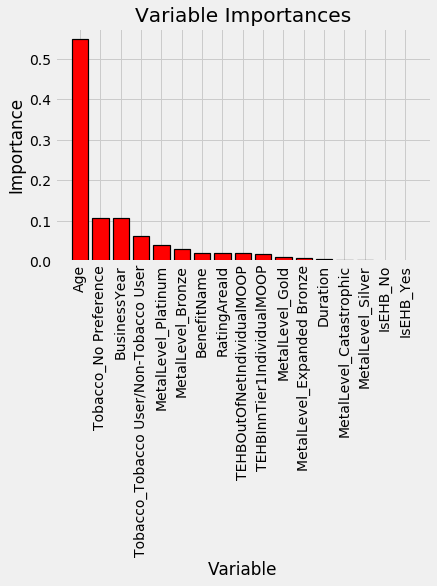

In [17]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = rates_ml_train_pred_dummies.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

#feature_importances.plot.bar( rot=90)

plt.bar(feature_importances.index, feature_importances.importance, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(feature_importances.index, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

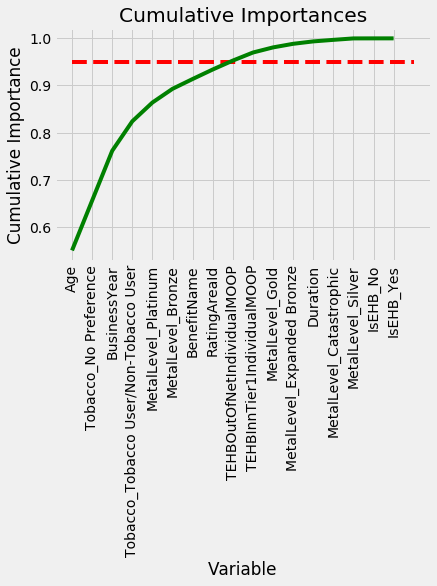

In [18]:
# Cumulative importances
cumulative_importances = np.cumsum(feature_importances['importance'])

# Make a line graph
plt.plot(feature_importances.index, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(feature_importances['importance']), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(feature_importances.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [52]:
print('Score on test data: ', dt.score(X_test, y_test))

Score on test data:  0.9016364411474052


The score is really good. It is predicting with 90% accuracy on Test dataset as well.

**Cross validation & Model Evaluation**

Implement 5 fold cross validation on the training dataset to train the model in much better way for Individual Rate.

In [4]:
y_train = rates_ml_train_target['IndividualRateTotallog'].values
X_train = rates_ml_train_pred_dummies.values
y_test = rates_ml_test_target['IndividualRateTotallog'].values
X_test = rates_ml_test_pred_dummies.values
# import all the neccessary packages.
from sklearn.model_selection import cross_val_score, train_test_split 
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [7]:
X1 = X_train
Y1 = y_train
validation_size = 0.20
seed = 7
scoring = 'r2'
X_train1, X_validation, Y_train1, Y_validation = train_test_split(X1, Y1, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('RD', Ridge()))
models.append(('LCV', LassoCV()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train1, Y_train1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
#    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Scores:",cv_results)

RD: 0.848540 (0.000409)
Scores: [0.84777365 0.84865597 0.84894855 0.84879888 0.84852119]
LCV: 0.605720 (0.000645)
Scores: [0.60471285 0.60523042 0.60644673 0.60606967 0.60614054]
RF: 0.966360 (0.000115)
Scores: [0.96618091 0.96640628 0.96649473 0.96644124 0.96627753]
GB: 0.923770 (0.000563)
Scores: [0.92435501 0.92346243 0.92448467 0.92353854 0.92300751]


In [20]:
cv_result = pd.read_csv("results.csv")
cv_result

,v1,v2,v3,v4,v5
RD,0.847774,0.848656,0.848949,0.848799,0.848521
LCV,0.604713,0.605230,0.606447,0.606070,0.606141
RF,0.966181,0.966406,0.966495,0.966441,0.966278
GB,0.924355,0.923462,0.924485,0.923539,0.923008


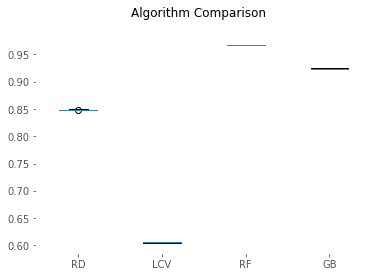

In [21]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels(cv_result.index)
plt.show()
#cv_result = pd.DataFrame(results,index=names,columns= ['v1', 'v2','v3', 'v4','v5'])
#cv_result  
#cv_result.to_csv("results.csv",index_label=False)

**Machine Learning: Since Random Forest is the clear winner we investigate it further**

# Hyperparameter tuning for Random Forest
**While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set before training.**

**Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.**

**Here I will try to get the best parameters for Random Forest estimator before running the test validations on the estimators.**

In [21]:
X1 = X_train
Y1 = y_train
validation_size = 0.5
seed = 7
scoring = 'r2'
X_train1, X_validation, Y_train1, Y_validation = train_test_split(X1, Y1, test_size=validation_size, random_state=seed)

In [30]:
X_train1.size

38514775

In [11]:
# By default setup of the hyper parameters by scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 7)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


# Defination of all hyper-parameters

**n_estimators** = number of trees in the foreset

**max_features** = max number of features considered for splitting a node

**max_depth** = max number of levels in each decision tree

**min_samples_split** = min number of data points placed in a node before the node is split

**min_samples_leaf** = min number of data points allowed in a leaf node

**bootstrap** = method for sampling data points (with or without replacement)

In [31]:
# Lets create the random hyper-parameter grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20, 50, 100]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [20, 50, 100],
 'min_samples_split': [20, 50, 100],
 'n_estimators': [200, 650, 1100, 1550, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, Y_train1)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [23]:
# Best Parameters searched are:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 50,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 35,
 'bootstrap': True}

In [5]:
# Lets determine if random search yielded a better model, we compare the base model with the best random search model.
# This function checks the performance of the model

def evaluate(model, test_features, test_labels,test_type='train'):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    r2 = r2_score(test_labels, predictions)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    print('Model Performance on ' , test_type)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("The absolute error of ", test_type, " data is : ", mae)
    print("The MSE of " ,test_type, " data is : ", mse)
    print("The out of sample R square of " ,test_type, " data is " , r2)
    scores = [r2,mae,mse,accuracy]
    return scores 

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 7)
base_model.fit(X_train1, Y_train1)
base_accuracy = evaluate(base_model, X_validation, y_validation)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train1, Y_train1)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [9]:
# Grid with only the number of trees changed
tree_grid = [1,2,5,10,20,30,50,70,100,120,150]
columns=['R2','MAE','MSE','Accuracy']
score_test= pd.DataFrame(columns=columns)
score_train = pd.DataFrame(columns=columns)
for tree in tree_grid:
    best_estimator = RandomForestRegressor(n_estimators = tree, random_state = 7,n_jobs=6)
    best_estimator.fit(X_train,y_train)
    score_train.loc[len(score_train)] = evaluate(best_estimator, X_train, y_train,test_type='train')
    score_test.loc[len(score_train)] = evaluate(best_estimator, X_test, y_test,test_type='test')

Model Performance on  train
Accuracy = 99.28%.
The absolute error of  train  data is :  0.0496139260139537
The MSE of  train  data is :  0.007625305995911624
The out of sample R square of  train  data is  0.9733365575943951
Model Performance on  test
Accuracy = 98.30%.
The absolute error of  test  data is :  0.12197131496513447
The MSE of  test  data is :  0.026581262312979522
The out of sample R square of  test  data is  0.8879381870525821
Model Performance on  train
Accuracy = 99.29%.
The absolute error of  train  data is :  0.049151056868209884
The MSE of  train  data is :  0.006986123419132895
The out of sample R square of  train  data is  0.9755715902385595
Model Performance on  test
Accuracy = 98.32%.
The absolute error of  test  data is :  0.12017950123134093
The MSE of  test  data is :  0.024679764807065435
The out of sample R square of  test  data is  0.8959545579577244
Model Performance on  train
Accuracy = 99.29%.
The absolute error of  train  data is :  0.04882562162110411


In [10]:
score_train.to_csv("score_train.csv")
score_test.to_csv("score_test.csv")

In [18]:
score_test.index = tree_grid
score_train.index = tree_grid

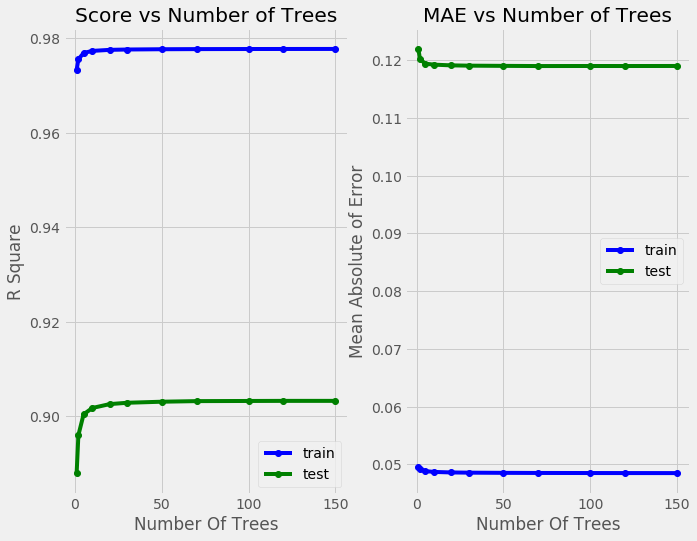

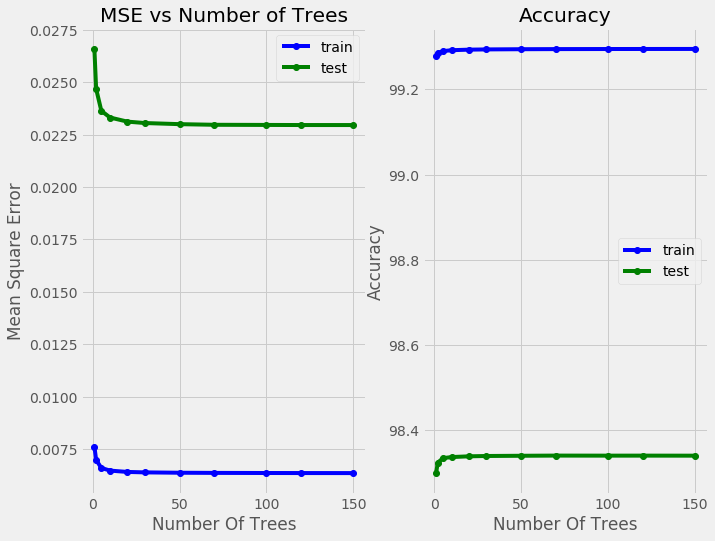

In [42]:
plt.subplots(1, 2, figsize=(10, 8))
plt.subplot(121)
plt.plot(tree_grid, score_train['R2'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['R2'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('R Square')
plt.title('Score vs Number of Trees')

plt.subplot(122)
plt.plot(tree_grid, score_train['MAE'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['MAE'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Mean Absolute of Error')
plt.title('MAE vs Number of Trees')

plt.subplots(1, 2, figsize=(10, 8))

plt.subplot(121)
plt.plot(tree_grid, score_train['MSE'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['MSE'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Number of Trees')


plt.subplot(122)
plt.plot(tree_grid, score_train['Accuracy'], 'bo-', label = 'train')
plt.plot(tree_grid, score_test['Accuracy'] , 'go-', label = 'test')
plt.legend()
plt.xlabel('Number Of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.show()

In [ ]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -10, ymax = 0)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
import pandas as pd
list1=[['a','b']]
list1 = list1.append(['e','f'])
print(list1)

None


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')